In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
%matplotlib inline
%load_ext autoreload
%autoreload 2

import sys,os, pprint, pickle, math, time, platform
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

pp = pprint.PrettyPrinter(indent=2, width=100)
print('Current working dir: ', os.getcwd())
if '..' not in sys.path:
    print("appending '..' to sys.path")
    sys.path.append('..')

import mrcnn.calculate_map as cmap
import mrcnn.visualize_2 as vis2


syst = platform.system()

#### BCE Training ---------------------------------------------------------------------------------
if syst == 'Windows':
    MAP_PATH    = "E:/git_projs/MRCNN3/train_coco/BCE_test_results"
    DIR_WEIGHTS = 'F:/models_coco/train_fcn8L2_BCE_subset/fcn20190112T0000' 
elif syst == 'Linux':
    MAP_PATH = "/home/kbardool/mrcnn3/train_coco/BCE_test_results"
#     MAP_PATH = "/home/kbardool/mrcnn3/train_coco/BCE_test_results_20190127"

    DIR_WEIGHTS = '/home/kbardool/models_coco/train_fcn8L2_BCE_subset/fcn20190112T0000' 
else :
    raise Error('unrecognized system ')

print(' OS ' , syst, ' : ', MAP_PATH)

files = ['fcn_0001.h5', 'fcn_0026.h5', 'fcn_0162.h5', 'fcn_0350.h5', 'fcn_0584.h5', 
          'fcn_0657.h5', 'fcn_0950.h5', 'fcn_1612.h5', 'fcn_1673.h5', 'fcn_2330.h5', 
          'fcn_3348.h5', 'fcn_3742.h5', 'fcn_3816.h5', 'fcn_4345.h5']   #idx 13,14,15,16,17
#### TEST MODE ---------------------------------------------------------------------------------

# if syst == 'Windows':
#     map_path = "E:/git_projs/MRCNN3/train_coco/MSE_eval_method"+eval_method+"_results"
#     DIR_WEIGHTS =  'F:/models_coco/train_fcn8L2_MSE_subset/fcn20190112T0000' 
# elif syst == 'Linux':
#     map_path   = "/home/kbardool/mrcnn3/train_coco/MSE_eval_method"+eval_method+"_results"
#     DIR_WEIGHTS =  '/home/kbardool/models_coco/train_fcn8L2_MSE_subset/fcn20190112T0000' 

# epochs = ['0001', '0150', '0346', '0421', '0450', 
#           '0521', '0687', '0793', '0821', '0940', 
#           '1012', '1127', '1644', '1776', '1848', 
#           '2017', '2084']   #idx 13,14,15,16,17

COLORS = [
    '#1f77b4', '#aec7e8', '#ff7f0e', '#ffbb78', '#2ca02c',
    '#98df8a', '#d62728', '#ff9896', '#9467bd', '#c5b0d5',
    '#8c564b', '#c49c94', '#e377c2', '#f7b6d2', '#7f7f7f',
    '#c7c7c7', '#bcbd22', '#dbdb8d', '#17becf', '#9edae5']    
# import mrcnn.utils     as utils
# import mrcnn.visualize as visualize


# COCO Class names
# Index of the class in the list is its ID. For example, to get ID of
# the teddy bear class, use: class_names.index('teddy bear')
CLASS_NAMES = ['BG', 'person', 'bicycle', 'car', 'motorcycle', 'airplane',
               'bus', 'train', 'truck', 'boat', 'traffic light',
               'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird',
               'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear',
               'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie',
               'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
               'kite', 'baseball bat', 'baseball glove', 'skateboard',
               'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup',
               'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
               'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
               'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed',
               'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote',
               'keyboard', 'cell phone', 'microwave', 'oven', 'toaster',
               'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors',
               'teddy bear', 'hair drier', 'toothbrush'] 
# class_names = ['ALL CLASSES', 'person', 'car', 'sun','building', 'tree', 'cloud']
CLASS_IDS     = [10, 11, 12, 13, 14, 
                 30, 31, 32, 33, 34, 
                 35, 36, 37, 38, 39, 
                 40, 41, 42, 43, 44, 
                 45, 46, 69, 70, 71, 
                 72, 73]

CLASS_IDS_SG1 = [10, 11, 12, 13, 14, 
                 30, 31, 32, 33, 34, 
                 35, 36]
CLASS_IDS_SG2 = [37, 38, 39, 
                 40, 41, 42, 43, 44, 
                 45, 46, 69, 70, 71, 
                 72, 73]


Current working dir:  /home/kbardool/git_projs/mrcnn3/notebooks
appending '..' to sys.path
 OS  Linux  :  /home/kbardool/mrcnn3/train_coco/BCE_test_results


Using TensorFlow backend.


## Load and display AP_results_2019_mm_dd (calculated over individual images)

In [2]:
new_AP_results_file = 'test_AP_results_2019_05_14'
print('Path:' ,MAP_PATH, '    Filename: ', new_AP_results_file)
vis2.display_AP_file( os.path.join(MAP_PATH, new_AP_results_file+'.pkl')) 


Path: /home/kbardool/mrcnn3/train_coco/BCE_test_results     Filename:  test_AP_results_2019_05_14

/home/kbardool/models_coco/train_fcn8L2_BCE_subset/fcn20190120T0000/fcn_1612.h5 1612
/home/kbardool/models_coco/train_fcn8L2_BCE_subset/fcn20190120T0000/fcn_1673.h5 1673
/home/kbardool/models_coco/train_fcn8L2_BCE_subset/fcn20190120T0000/fcn_2330.h5 2330
/home/kbardool/models_coco/train_fcn8L2_BCE_subset/fcn20190120T0000/fcn_3348.h5 3348
/home/kbardool/models_coco/train_fcn8L2_BCE_subset/fcn20190120T0000/fcn_3742.h5 3742
/home/kbardool/models_coco/train_fcn8L2_BCE_subset/fcn20190120T0000/fcn_3816.h5 3816
/home/kbardool/models_coco/train_fcn8L2_BCE_subset/fcn20190120T0000/fcn_4345.h5 4345


After 1612 training epochs.
Weight file: /home/kbardool/models_coco/train_fcn8L2_BCE_subset/fcn20190120T0000/fcn_1612.h5

Images   Epochs   MRCNN_AP_Orig    MRCNN_AP_0      FCN_AP_0    MRCNN_AP_1      FCN_AP_1    MRCNN_AP_2      FCN_AP_2
------------------------------------------------------------------

In [3]:
new_AP_results_file = 'test_AP_results_2019_05_15'
print('Path:' ,MAP_PATH, '    Filename: ', new_AP_results_file)
vis2.display_AP_file( os.path.join(MAP_PATH, new_AP_results_file+'.pkl')) 


Path: /home/kbardool/mrcnn3/train_coco/BCE_test_results     Filename:  test_AP_results_2019_05_15

/home/kbardool/models_coco/train_fcn8L2_BCE_subset/fcn20190120T0000/fcn_3816.h5 3816
/home/kbardool/models_coco/train_fcn8L2_BCE_subset/fcn20190120T0000/fcn_4345.h5 4345


After 3816 training epochs.
Weight file: /home/kbardool/models_coco/train_fcn8L2_BCE_subset/fcn20190120T0000/fcn_3816.h5

Images   Epochs   MRCNN_AP_Orig    MRCNN_AP_0      FCN_AP_0    MRCNN_AP_1      FCN_AP_1    MRCNN_AP_2      FCN_AP_2
--------------------------------------------------------------------------------------------------------------------
10        3816          0.60274       0.31832       0.33912       0.30556       0.28519       0.30694       0.32350
50        3816          0.56719       0.42893       0.33794       0.40688       0.32933       0.40485       0.32101
100       3816          0.53066       0.40705       0.32009       0.39874       0.30676       0.40337       0.31345
250       3816          0.

In [36]:
# MAP_PATH = "/home/kbardool/mrcnn3/train_coco/BCE_test_results_20190127"
new_AP_results_file = 'test_AP_results_2019_01_27'

print('Path:' ,MAP_PATH, '    Filename: ', new_AP_results_file)
map_file = os.path.join(MAP_PATH, new_AP_results_file+'.pkl') 
vis2.display_AP_file(map_file)

Path: /home/kbardool/mrcnn3/train_coco/BCE_test_results_20190127     Filename:  test_AP_results_2019_01_27

/home/kbardool/models_coco/train_fcn8L2_BCE_subset/fcn20190120T0000/fcn_1612.h5 1612
/home/kbardool/models_coco/train_fcn8L2_BCE_subset/fcn20190120T0000/fcn_1673.h5 1673
/home/kbardool/models_coco/train_fcn8L2_BCE_subset/fcn20190120T0000/fcn_2330.h5 2330
/home/kbardool/models_coco/train_fcn8L2_BCE_subset/fcn20190120T0000/fcn_3348.h5 3348
/home/kbardool/models_coco/train_fcn8L2_BCE_subset/fcn20190123T0000/fcn_3742.h5 3742
/home/kbardool/models_coco/train_fcn8L2_BCE_subset/fcn20190123T0000/fcn_3816.h5 3816
/home/kbardool/models_coco/train_fcn8L2_BCE_subset/fcn20190123T0000/fcn_4345.h5 4345


After 1612 training epochs.
Weight file: /home/kbardool/models_coco/train_fcn8L2_BCE_subset/fcn20190120T0000/fcn_1612.h5

Images   Epochs   MRCNN_AP_Orig    MRCNN_AP_0      FCN_AP_0    MRCNN_AP_1      FCN_AP_1    MRCNN_AP_2      FCN_AP_2
---------------------------------------------------------

In [37]:
MAP_PATH = "/home/kbardool/mrcnn3/train_coco/BCE_test_results"
new_AP_results_file = 'test_AP_results_2019_05_11'

print('Path:' ,MAP_PATH, '    Filename: ', new_AP_results_file)
map_file = os.path.join(MAP_PATH, new_AP_results_file+'.pkl') 
vis2.display_AP_file(map_file)

Path: /home/kbardool/mrcnn3/train_coco/BCE_test_results     Filename:  test_AP_results_2019_05_11

/home/kbardool/models_coco/train_fcn8L2_BCE_subset/fcn20190120T0000/fcn_1612.h5 1612
/home/kbardool/models_coco/train_fcn8L2_BCE_subset/fcn20190120T0000/fcn_1673.h5 1673
/home/kbardool/models_coco/train_fcn8L2_BCE_subset/fcn20190120T0000/fcn_2330.h5 2330
/home/kbardool/models_coco/train_fcn8L2_BCE_subset/fcn20190120T0000/fcn_3348.h5 3348
/home/kbardool/models_coco/train_fcn8L2_BCE_subset/fcn20190120T0000/fcn_3742.h5 3742
/home/kbardool/models_coco/train_fcn8L2_BCE_subset/fcn20190120T0000/fcn_3816.h5 3816
/home/kbardool/models_coco/train_fcn8L2_BCE_subset/fcn20190120T0000/fcn_4345.h5 4345


After 1612 training epochs.
Weight file: /home/kbardool/models_coco/train_fcn8L2_BCE_subset/fcn20190120T0000/fcn_1612.h5

Images   Epochs   MRCNN_AP_Orig    MRCNN_AP_0      FCN_AP_0    MRCNN_AP_1      FCN_AP_1    MRCNN_AP_2      FCN_AP_2
------------------------------------------------------------------

In [38]:
map_file = '/home/kbardool/mrcnn3/train_coco/test_AP_results_2019_01_08.pkl'
vis2.display_AP_file(map_file)


/home/kbardool/models_coco/train_fcn8_l2_bce_subset/fcn20181221T0000/fcn_0001.h5 0001
/home/kbardool/models_coco/train_fcn8_l2_bce_subset/fcn20181221T0000/fcn_0010.h5 0010
/home/kbardool/models_coco/train_fcn8_l2_bce_subset/fcn20181221T0000/fcn_0657.h5 0657
/home/kbardool/models_coco/train_fcn8_l2_bce_subset/fcn20181221T0000/fcn_0950.h5 0950
/home/kbardool/models_coco/train_fcn8_l2_bce_subset/fcn20181230T0000/fcn_1065.h5 1065
/home/kbardool/models_coco/train_fcn8_l2_bce_subset/fcn20181230T0000/fcn_1095.h5 1095
/home/kbardool/models_coco/train_fcn8_l2_bce_subset/fcn20181230T0000/fcn_1108.h5 1108
/home/kbardool/models_coco/train_fcn8_l2_bce_subset/no_improvement_fcn20181223T0000/fcn_1294.h5 1294
/home/kbardool/models_coco/train_fcn8_l2_bce_subset/no_improvement_fcn20181224T0000/fcn_1065.h5 1065
/home/kbardool/models_coco/train_fcn8_l2_bce_subset/no_improvement_fcn20181224T0000/fcn_1087.h5 1087
/home/kbardool/models_coco/train_fcn8_l2_bce_subset/no_improvement_fcn20181224T0000/fcn_1213.h

## Build Mean Average Precision Data Structure 
Using loaded gt_boxes and pr_boxes.
    ALL_DATA is a dictionary keyed by class_id to dictionaries, one for each possible score. Each SCORE dictionary is itrself a dictionary with keys for iOUs 
    between 0.5 and 0.95. Each dictionary entry has the following keys:
    {'iou', 'model_thrs', 'recalls', 'precisions', 'avg_prec'}
    iou :         indicates the iOU threshold of the dictionary entry
    model_thrs:   score thresholds
    recalls   :   recall at threshold
    precision :   precision at threshold


- Create `gt_boxes_class`, `pr_boxes_class` (separated by class)  - 

### Build and Save `map_info_epochxxxx` file from  `gt_boxes`, `pr_boxes`, and `cls_info` data structures 

In [4]:
for FILE_IDX in [-1]:
    epochs = files[FILE_IDX].split('_')[1].replace('.h5','')

    cls_info_file = 'test_cls_info_epoch' +epochs+'_500.pkl'
    pr_boxes_file = 'test_pr_bboxes_epoch'+epochs+'_500.pkl'
    gt_boxes_file = 'test_gt_bboxes_epoch'+epochs+'_500.pkl'
 
    with open(os.path.join(MAP_PATH, cls_info_file), 'rb') as infile:
        cls_info = pickle.load(infile)            
    with open(os.path.join(MAP_PATH, pr_boxes_file), 'rb') as infile:
        pr_boxes = pickle.load(infile)
    with open(os.path.join(MAP_PATH, gt_boxes_file), 'rb') as infile:
        gt_boxes = pickle.load(infile)
    print('loaded :', cls_info_file, '   ', pr_boxes_file, '    ', gt_boxes_file)    

     ## build gt_boxes_class, pr_boxes_class which only containing info for each class
        
    scores    = [ 'mrcnn_score_orig', 'mrcnn_score_norm', 'mrcnn_score_0', 'mrcnn_score_1', 'mrcnn_score_2', 'fcn_score_0', 'fcn_score_1', 'fcn_score_2']
#     iou_thresholds = np.arange(0.20, 0.95, 0.05)
    iou_threshold = 0.50 
    
    all_data = gt_boxes_class = pr_boxes_class = {}

loaded : test_cls_info_epoch4345_500.pkl     test_pr_bboxes_epoch4345_500.pkl      test_gt_bboxes_epoch4345_500.pkl


In [5]:
    gt_boxes_class, pr_boxes_class  = cmap.filter_by_class(gt_boxes, pr_boxes, class_ids= CLASS_IDS )

 # pr keys : 500 # gt_keys:  500
 filter_by_class(): Processing class :  10
 filter_by_class(): Processing class :  11
 filter_by_class(): Processing class :  12
 filter_by_class(): Processing class :  13
 filter_by_class(): Processing class :  14
 filter_by_class(): Processing class :  30
 filter_by_class(): Processing class :  31
 filter_by_class(): Processing class :  32
 filter_by_class(): Processing class :  33
 filter_by_class(): Processing class :  34
 filter_by_class(): Processing class :  35
 filter_by_class(): Processing class :  36
 filter_by_class(): Processing class :  37
 filter_by_class(): Processing class :  38
 filter_by_class(): Processing class :  39
 filter_by_class(): Processing class :  40
 filter_by_class(): Processing class :  41
 filter_by_class(): Processing class :  42
 filter_by_class(): Processing class :  43
 filter_by_class(): Processing class :  44
 filter_by_class(): Processing class :  45
 filter_by_class(): Processing class :  46
 filter_by_class(): P

In [6]:
gt_boxes_class[39]

{'newshapes_00006': {'boxes': [[505, 616, 603, 743], [603, 885, 622, 895]],
  'class_ids': [39, 39]},
 'newshapes_00017': {'boxes': [[169, 613, 353, 666]], 'class_ids': [39]},
 'newshapes_00024': {'boxes': [[595, 310, 670, 363]], 'class_ids': [39]},
 'newshapes_00045': {'boxes': [[536, 689, 662, 835]], 'class_ids': [39]},
 'newshapes_00053': {'boxes': [[210, 446, 343, 629]], 'class_ids': [39]},
 'newshapes_00062': {'boxes': [[544, 486, 599, 592]], 'class_ids': [39]},
 'newshapes_00079': {'boxes': [[340, 235, 475, 321]], 'class_ids': [39]},
 'newshapes_00087': {'boxes': [], 'class_ids': []},
 'newshapes_00096': {'boxes': [[180, 625, 334, 645]], 'class_ids': [39]},
 'newshapes_00106': {'boxes': [], 'class_ids': []},
 'newshapes_00119': {'boxes': [[584, 0, 660, 114]], 'class_ids': [39]},
 'newshapes_00121': {'boxes': [[634, 486, 660, 512],
   [474, 903, 483, 912],
   [463, 632, 475, 650]],
  'class_ids': [39, 39, 39]},
 'newshapes_00123': {'boxes': [[259, 754, 386, 1010]], 'class_ids': [3

In [ ]:
    all_data = cmap.build_mAP_data_structure_by_class(gt_boxes_class, pr_boxes_class,  CLASS_IDS, scores, iou_thresholds)
    all_data[0] = cmap.build_mAP_data_structure_combined(gt_boxes, pr_boxes, scores, iou_thresholds)

    print(all_data.keys())

    ### Save mAP data to file `map_info_epochxxxx.pkl` for future reuse

In [ ]:
    map_info_file = 'test_map_info_epoch'+epochs+'.pkl'
    with open(os.path.join(map_path, map_info_file), 'wb') as outfile:
        pickle.dump(all_data, outfile)            
    print(' Datafile :', map_info_file , ' saved')

### Load previously build `map_info_epochxxxx`  file

In [11]:
FILE_IDX = 7
epochs = files[FILE_IDX].split('_')[1].replace('.h5','')

map_info_file = 'test_map_info_epoch' +epochs+'.pkl'

with open(os.path.join(MAP_PATH, map_info_file), 'rb') as infile:
    all_data = pickle.load(infile)             
print('loaded :', map_info_file)  



loaded : test_map_info_epoch1612.pkl


## Load `gt_boxes`, `pr_boxes`, and `cls_info` data structures 

In [12]:
FILE_IDX = -1
epochs = files[FILE_IDX].split('_')[1].replace('.h5','')
epochs = '4345'
map_info_file = 'test_map_info_epoch' +epochs+'.pkl'
cls_info_file = 'test_cls_info_epoch' +epochs+'_500.pkl'
pr_boxes_file = 'test_pr_bboxes_epoch'+epochs+'_500.pkl'
gt_boxes_file = 'test_gt_bboxes_epoch'+epochs+'_500.pkl'
 

# with open(os.path.join(map_path, cls_info_file), 'rb') as infile:
#     cls_info_load = pickle.load(infile)            
# cls_info =  [] 
# cls_info.extend([cls_info_load[i] for i in CLASS_IDS])
    
# with open(os.path.join(map_path, pr_boxes_file), 'rb') as infile:
#     pr_boxes = pickle.load(infile)
# with open(os.path.join(map_path, gt_boxes_file), 'rb') as infile:
#     gt_boxes = pickle.load(infile)
print('loaded :', cls_info_file, '   ', pr_boxes_file, '    ', gt_boxes_file)    
    

# path = "F:\\PretrainedModels"
# with open(os.path.join(path,"E:\\git_projs\\MRCNN3\\train_newshapes\\newshapes_predicted_classes_info.pkl"), 'rb') as infile:
#     class_pr_info = pickle.load(infile)            
# with open(os.path.join(path,"newshapes_predicted_bboxes.pkl"), 'rb') as infile:
#     pr_boxes = pickle.load(infile)
# with open(os.path.join(path,"newshapes_ground_truth_bboxes.pkl"), 'rb') as infile:
#     gt_boxes = pickle.load(infile)

# path = "E:\\git_projs\\MRCNN3\\train_coco"
# epoch = '2017'
# path = "E:\\git_projs\\MRCNN3\\train_newshapes\\training_results"
# cls_info_file = 'test_cls_info_epoch'+epoch+'_500.pkl'
# pr_boxes_file = 'test_pr_bboxes_epoch'+epoch+'_500.pkl'
# gt_boxes_file = 'test_gt_bboxes_epoch'+epoch+'_500.pkl'
with open(os.path.join(MAP_PATH, cls_info_file), 'rb') as infile:
    cls_info = pickle.load(infile)            
with open(os.path.join(MAP_PATH, pr_boxes_file), 'rb') as infile:
    pr_boxes = pickle.load(infile)
with open(os.path.join(MAP_PATH, gt_boxes_file), 'rb') as infile:
    gt_boxes = pickle.load(infile)

loaded : test_cls_info_epoch4345_500.pkl     test_pr_bboxes_epoch4345_500.pkl      test_gt_bboxes_epoch4345_500.pkl


#### Print some info

In [15]:
pr_keys = list(pr_boxes.keys())
gt_keys = list(gt_boxes.keys())
# cls_keys= cls_info
# print(gt_boxes.keys())
print(len(gt_boxes.keys()), len(pr_boxes.keys()), len(cls_info))
print(len(gt_keys), gt_keys[:10])
print(len(pr_keys), pr_keys[:10])
print('keys for CLS_INFO')
# print(cls_info.keys())
# pp.pprint(cls_info)
print()
print('keys for PR')
print(pr_boxes[pr_keys[0]].keys())
print('pr key      : ',pr_keys[0])
print('pr boxes    : ',pr_boxes[pr_keys[0]]['boxes'])
print('pr scores   : ',pr_boxes[pr_keys[0]]['scores'])
print('pr class ids: ',pr_boxes[pr_keys[0]]['class_ids'])
print('pr det-ind  : ',pr_boxes[pr_keys[0]]['det_ind'])
print()
print('keys for GT')
print(gt_boxes[gt_keys[0]].keys())
print('gt key      : ',gt_keys[0])
print('gt boxes    : ',gt_boxes[gt_keys[0]]['boxes'])
print('gt class ids: ',gt_boxes[gt_keys[0]]['class_ids'])


500 500 81
500 ['newshapes_00159', 'newshapes_00289', 'newshapes_00420', 'newshapes_00148', 'newshapes_00044', 'newshapes_00012', 'newshapes_00146', 'newshapes_00009', 'newshapes_00411', 'newshapes_00248']
500 ['newshapes_00159', 'newshapes_00289', 'newshapes_00420', 'newshapes_00148', 'newshapes_00044', 'newshapes_00012', 'newshapes_00146', 'newshapes_00009', 'newshapes_00411', 'newshapes_00248']
keys for CLS_INFO

keys for PR
dict_keys(['fcn_score_1_norm', 'fcn_score_0', 'fcn_score_2_norm', 'fcn_score_1', 'scores', 'mrcnn_score_0', 'mrcnn_score_1_norm', 'mrcnn_score_1', 'mrcnn_score_2_norm', 'mrcnn_score_2', 'class_ids', 'mrcnn_score_orig', 'fcn_score_2', 'det_ind', 'boxes', 'mrcnn_score_norm'])
pr key      :  newshapes_00159
pr boxes    :  [[161.0, 350.0, 269.0, 489.0], [33.0, 133.0, 51.0, 165.0], [51.0, 44.0, 250.0, 484.0], [33.0, 134.0, 51.0, 168.0], [185.0, 81.0, 202.0, 109.0]]
pr scores   :  [0.9987, 0.6535, 0.5753, 0.5206, 0.4446]
pr class ids:  [39, 39, 14, 35, 44]
pr det-ind 

In [ ]:
# for key in sorted(pr_keys[:1000]):  ##  'newshapes_00115'
#     print(key, '  ' ,  pr_boxes[key]['mrcnn_score_1'] == pr_boxes[key]['mrcnn_score_2'] , ' - ',pr_boxes[key]['mrcnn_score_1'],pr_boxes[key]['mrcnn_score_2'])
#     print(key, '  ' , pr_boxes[key]['mrcnn_score_1'] == pr_boxes[key]['mrcnn_score_2'] )

#### all_data - display info

In [19]:
all_data[39]

{'fcn_score_0': {0.2: {'avg_prec': 0.0,
   'iou': 0.2,
   'model_thrs': [-84.1883,
    -68.3998,
    -63.2675,
    -51.8162,
    -49.4959,
    -40.109,
    -39.7722,
    -38.801,
    -31.9522,
    -29.9437,
    -22.394,
    -22.0236,
    -21.6252,
    -21.4795,
    -17.8824,
    -14.4722,
    -14.1038,
    -13.3395,
    -12.3923,
    -10.3891,
    -10.1988,
    -9.2338,
    -9.0851,
    -7.7684,
    -7.3752,
    -6.9366,
    -6.5007,
    -6.2521,
    -6.1763,
    -5.6136,
    -5.0796,
    -5.0432,
    -4.8935,
    -4.8623,
    -4.8019,
    -4.4709,
    -3.5571,
    -3.2147,
    -3.0469,
    -2.6562,
    -2.4179,
    -2.1976,
    -1.9586,
    -1.7601,
    -1.6238,
    -1.3647,
    -1.095,
    -0.9873,
    -0.7484,
    -0.6465,
    -0.5457,
    -0.4273,
    -0.392,
    -0.3549,
    -0.2314,
    -0.0037,
    0.0763,
    0.6028,
    0.7038,
    0.8302,
    4.5264],
   'prec_at_rec': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
   'precisions': array([0., 0., 0., 0., 0., 0., 0.,

#### `cls_info` - display information

In [ ]:
print(cls_info[1]['scores'][:20])
print(cls_info[1]['mrcnn_score_orig'][:20])
print(cls_info[1]['mrcnn_score_norm'][:20])
print()
print(cls_info[1]['mrcnn_score_0'][:20])
print(cls_info[1]['mrcnn_score_1'][:20])
print(cls_info[1]['mrcnn_score_2'][:20])
 

In [ ]:
# gt_boxes_class, pr_boxes_class = filter_by_class(gt_boxes, pr_boxes, class_id= 2)
# print(len(pr_boxes_class.keys()), len(gt_boxes_class.keys()))

In [ ]:
# for img_id in pred_boxes.keys():
#     arg_sort = np.argsort(pred_boxes[img_id]['scores'])
#     pred_boxes[img_id]['scores'] = np.array(pred_boxes[img_id]['scores'])[arg_sort].tolist()
#     pred_boxes[img_id]['boxes']  = np.array(pred_boxes[img_id]['boxes'])[arg_sort].tolist()

# print(type(class_pr_info), type(pr_boxes))    
# pr_keys = list(gt_boxes.keys())
# print(len(pr_keys))
# pp.pprint(class_pr_info[6].keys())

# class_stats  = {}
# class_stats.setdefault('avg', [cls['avg'] for cls in class_pr_info])
# class_stats.setdefault('pct', [cls['percentiles'] for cls in class_pr_info])   
# pp.pprint(class_stats)

# print(len(pr_keys), pr_keys[0])
# print(pr_boxes[pr_keys[0]])

# print(pred_boxes[pr_keys[0]])
# print(len(gt_boxes.keys()))

#### Print some info

In [ ]:
print(gt_boxes['newshapes_00469'])
print(gt_boxes_class[1]['newshapes_00469'])
print()
pp.pprint(pr_boxes['newshapes_00469'])
pp.pprint(pr_boxes_class[1]['newshapes_00469'])

In [ ]:
# class_data = all_data[1]
# score_key = 'scores'
# for idx, iou_key in enumerate(sorted(class_data[score_key])):
#     print(idx, iou_key)
bb = [0.7777, 0.7569, 0.6442, 0.4946, 0.3545, 0.1565, 0.0654, 0.0264, 0.005]
avg_precs = [" {:10.4f}".format(ap) for ap in bb]
# avg_precs = [str(ap) for ap in bb]
b1 = ""
print(b1.join(avg_precs))

## Display distribution of various scores 

/home/kbardool/anaconda3/envs/TFG/lib/python3.5/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/kbardool/anaconda3/envs/TFG/lib/python3.5/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/kbardool/anaconda3/envs/TFG/lib/python3.5/site-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/kbardool/anaconda3/envs/TFG/lib/python3.5/site-packages/numpy/core/_methods.py:105: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/home/kbardool/anaconda3/envs/TFG/lib/python3.5/site-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/kbardool/anaconda3/envs/TFG/lib/python3.5/site-packages/seaborn/distributions.py:198: RuntimeWarni

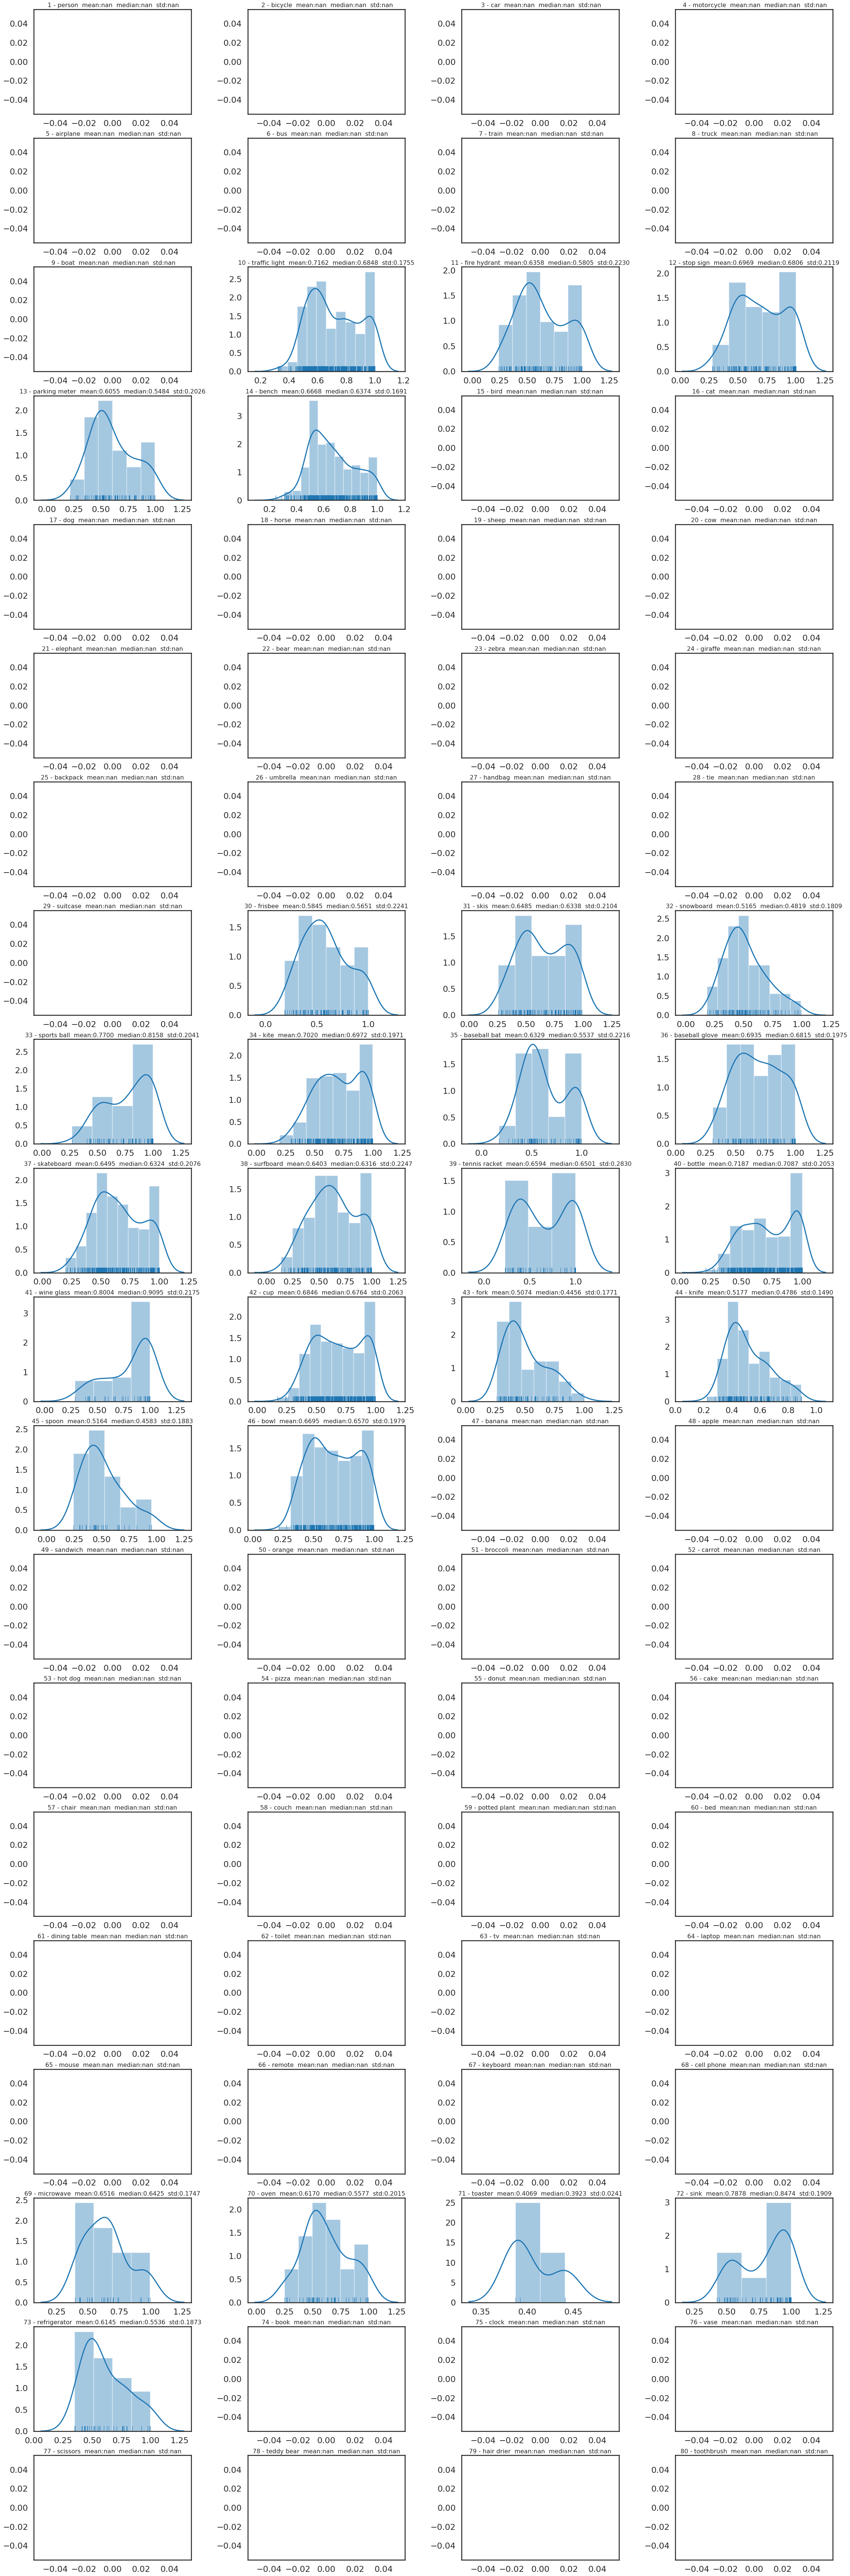

In [9]:
cmap.plot_score_distribution(cls_info, 'mrcnn_score_orig')

In [ ]:
plot_score_distribution(cls_info, 'mrcnn_score_norm')

In [ ]:
plot_score_distribution(cls_info, 'mrcnn_score_0')

In [ ]:
plot_score_distribution(cls_info, 'mrcnn_score_1')

In [ ]:
plot_score_distribution(cls_info, 'mrcnn_score_2')

In [ ]:
plot_score_distribution(cls_info, 'fcn_score_0')

In [ ]:
plot_score_distribution(cls_info, 'fcn_score_1')

In [ ]:
plot_score_distribution(cls_info, 'fcn_score_2')

#### display of gt_boxes_class, pr_boxes_class

In [ ]:
# gt_boxes_class, pr_boxes_class = filter_by_class(gt_boxes, pr_boxes, class_id= 5)
gt_boxes_class, pr_boxes_class = filter_by_class_2(gt_boxes, pr_boxes, class_id= 2)
print(type(gt_boxes_class), type(pr_boxes_class))
pr_keys = list(pr_boxes_class.keys())
gt_keys = list(gt_boxes_class.keys())
print(len(gt_boxes.keys()), len(pr_boxes.keys()))
print(len(gt_keys), gt_keys[:10])
print(len(pr_keys), pr_keys[:10])
sel_gt_keys = gt_keys[:3]
sel_pr_keys = pr_keys[:3]
# pp.pprint(pr_boxes['newshapes_00002'])
for key in gt_keys[:3]:
    print('-----------------------')
    print('Key: ', key)
    print('-----------------------')
    pp.pprint(pr_boxes_class[key])
    print()
    pp.pprint(gt_boxes_class[key])

In [ ]:

# class_ids     = [10, 11, 12, 13, 14, 15, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 46, 69, 70, 71, 72, 73]
# Runs it for one IoU threshold


##  Create `gt_boxes_class`, `pr_boxes_class` (separated by class)

In [ ]:
class_ids = [1,2,3,4,5,6]
## build gt_boxes_class, pr_boxes_class which only containing info for each class 
gt_boxes_class = pr_boxes_class = {}

gt_boxes_class, pr_boxes_class  = cmap.filter_by_class(gt_boxes, pr_boxes, class_ids= class_ids)

print(gt_boxes_class[1]['newshapes_00492'].keys())
print(gt_boxes_class[1]['newshapes_00492']['class_ids'])
print(gt_boxes_class[1]['newshapes_00492']['boxes'])

print(gt_boxes_class.keys(), pr_boxes_class.keys())

In [ ]:
# class_ids     = [10, 11, 12, 13, 14, 
#                  15, 30, 31, 32, 33, 
#                  34, 35, 36, 37, 38, 
#                  39, 40, 41, 42, 43,
#                  44, 46, 69, 70, 71, 
#                  72, 73]
# class_ids = [1,2,3,4,5,6]
# ## build gt_boxes_class, pr_boxes_class which only containing info for each class 
# gt_boxes_class_1 = {}
# pr_boxes_class_1 = {}

# for cls in class_ids :
#     print('class id :', cls)
#     a, b = cmap.filter_by_class(gt_boxes, pr_boxes, class_id= cls)
#     gt_boxes_class_1[cls] = a
#     pr_boxes_class_1[cls] = b
# print(gt_boxes_class_1.keys())    
# print(pr_boxes_class_1.keys())    
# print(gt_boxes_class_1[1]['newshapes_00492'].keys())


# key = 'newshapes_00321' 
# cls = 3
# print(gt_boxes_class_1[cls][key]['class_ids'])
# print(gt_boxes_class_1[cls][key]['boxes'])
# print(gt_boxes_class[cls][key]['class_ids'])
# print(gt_boxes_class[cls][key]['boxes'])

# print(' ==== P')
# print(pr_boxes_class_1[cls][key]['class_ids'])
# print(pr_boxes_class_1[cls][key]['boxes'])
# print(pr_boxes_class[cls][key]['class_ids'])
# print(pr_boxes_class[cls][key]['boxes'])

In [ ]:
for cls in [1,2,3,4,5,6]:
    print('========================================')
    for i in pr_boxes_class[cls]:
        print(cls, '  ', i, len(pr_boxes_class[cls][i]['class_ids']), len(pr_boxes_class[cls][i]['boxes']))
        print(cls, '  ', i, len(gt_boxes_class[cls][i]['class_ids']), len(gt_boxes_class[cls][i]['boxes']))

### Display mAP for one class and one threshold

In [ ]:
cls = 1

iou_thr = 0.5
start_time = time.time()
data =  cmap.get_avg_precision_at_iou(gt_boxes_class[cls], pr_boxes_class[cls], iou_thr=iou_thr, score_key = 'scores')
end_time = time.time()
print('Single IoU calculation took {:.4f} secs'.format(end_time - start_time))
print('avg precision: {:.4f}'.format(data['avg_prec']))
# pp.pprint(data)

idx = 0
ax = None
avg_precs = []
iou_thrs = []
avg_precs.append(data['avg_prec'])
iou_thrs.append(iou_thr)
precisions = data['precisions']
recalls    = data['recalls']
print(iou_thrs)
print(avg_precs)
print(' precisions: ', precisions.shape)
print(' recalls   : ', recalls.shape)
ax = cmap.plot_pr_curve(precisions, recalls, label='{:.2f}'.format(iou_thr), color=COLORS[idx*2], ax=ax)

avg_precs = [float('{:.4f}'.format(ap)) for ap in avg_precs]
iou_thrs = [float('{:.4f}'.format(thr)) for thr in iou_thrs]
print('map: {:.2f}'.format(100*np.mean(avg_precs)))
print('avg precs: ', avg_precs)
print('iou_thrs:  ', iou_thrs)
plt.legend(loc='upper right', title='IOU Thr', frameon=True)
for xval in np.linspace(0.0, 1.0, 11):
    plt.vlines(xval, 0.0, 1.1, color='gray', alpha=0.3, linestyles='dashed')
end_time = time.time()
print('\nPlotting and calculating mAP takes {:.4f} secs'.format(end_time - start_time))
plt.show()

### Display mAP one threshold (across all classes)

In [ ]:
cls = 1

iou_thr = 0.5
start_time = time.time()
data =  cmap.get_avg_precision_at_iou(gt_boxes, pr_boxes, iou_thr=iou_thr, score_key = 'scores')
end_time = time.time()
print('Single IoU calculation took {:.4f} secs'.format(end_time - start_time))
print('avg precision: {:.4f}'.format(data['avg_prec']))
# pp.pprint(data)

idx = 0
ax = None
avg_precs = []
iou_thrs = []
avg_precs.append(data['avg_prec'])
iou_thrs.append(iou_thr)
precisions = data['precisions']
recalls    = data['recalls']
print(iou_thrs)
print(avg_precs)
print(' precisions: ', precisions.shape)
print(' recalls   : ', recalls.shape)
ax = cmap.plot_pr_curve(precisions, recalls, label='{:.2f}'.format(iou_thr), color=COLORS[idx*2], ax=ax)

avg_precs = [float('{:.4f}'.format(ap)) for ap in avg_precs]
iou_thrs = [float('{:.4f}'.format(thr)) for thr in iou_thrs]
print('map: {:.2f}'.format(100*np.mean(avg_precs)))
print('avg precs: ', avg_precs)
print('iou_thrs:  ', iou_thrs)
plt.legend(loc='upper right', title='IOU Thr', frameon=True)
for xval in np.linspace(0.0, 1.0, 11):
    plt.vlines(xval, 0.0, 1.1, color='gray', alpha=0.3, linestyles='dashed')
end_time = time.time()
print('\nPlotting and calculating mAP takes {:.4f} secs'.format(end_time - start_time))
plt.show()

## Barchart mAP vs. Class for different scores `plot_mAP_vs_class()`

In [11]:
# disp_scores  = [ 'mrcnn_score_orig' , 'mrcnn_score_norm', 'mrcnn_score_0', 'mrcnn_score_1', 'mrcnn_score_2', 'fcn_score_0', 'fcn_score_1', 'fcn_score_2']
disp_scores  = ['mrcnn_score_orig','mrcnn_score_1', 'fcn_score_1', 'mrcnn_score_2', 'fcn_score_2']

In [ ]:
# FILE_IDX = -1
# epochs = files[FILE_IDX].split('_')[1].replace('.h5','')
# map_info_file = 'test_map_info_epoch' +epochs+'.pkl'
# with open(os.path.join(MAP_PATH, map_info_file), 'rb') as infile:
#     all_data = pickle.load(infile)             
# print('loaded :', map_info_file)  
# print('Epch:', epochs)

In [25]:
# cmap.plot_mAP_vs_class_BarChart(all_data, disp_scores, class_ids= CLASS_IDS_SG1,class_names = CLASS_NAMES, iou = 0.5)
# cmap.plot_mAP_vs_class_BarChart(all_data, disp_scores, class_ids= CLASS_IDS_SG2,class_names = CLASS_NAMES, iou = 0.5)
# cmap.plot_mAP_vs_class_BarChart(all_data, disp_scores, class_names = CLASS_NAMES, iou = 0.5)
# cmap.plot_mAP_vs_class_BarChart(all_data, disp_scores, class_names = CLASS_NAMES, iou = 0.75)

<class 'dict'>
loaded : test_map_info_epoch4345.pkl     test_cls_info_epoch4345_500.pkl
disp_scores:  ['mrcnn_score_orig', 'mrcnn_score_1', 'fcn_score_1', 'mrcnn_score_2', 'fcn_score_2']


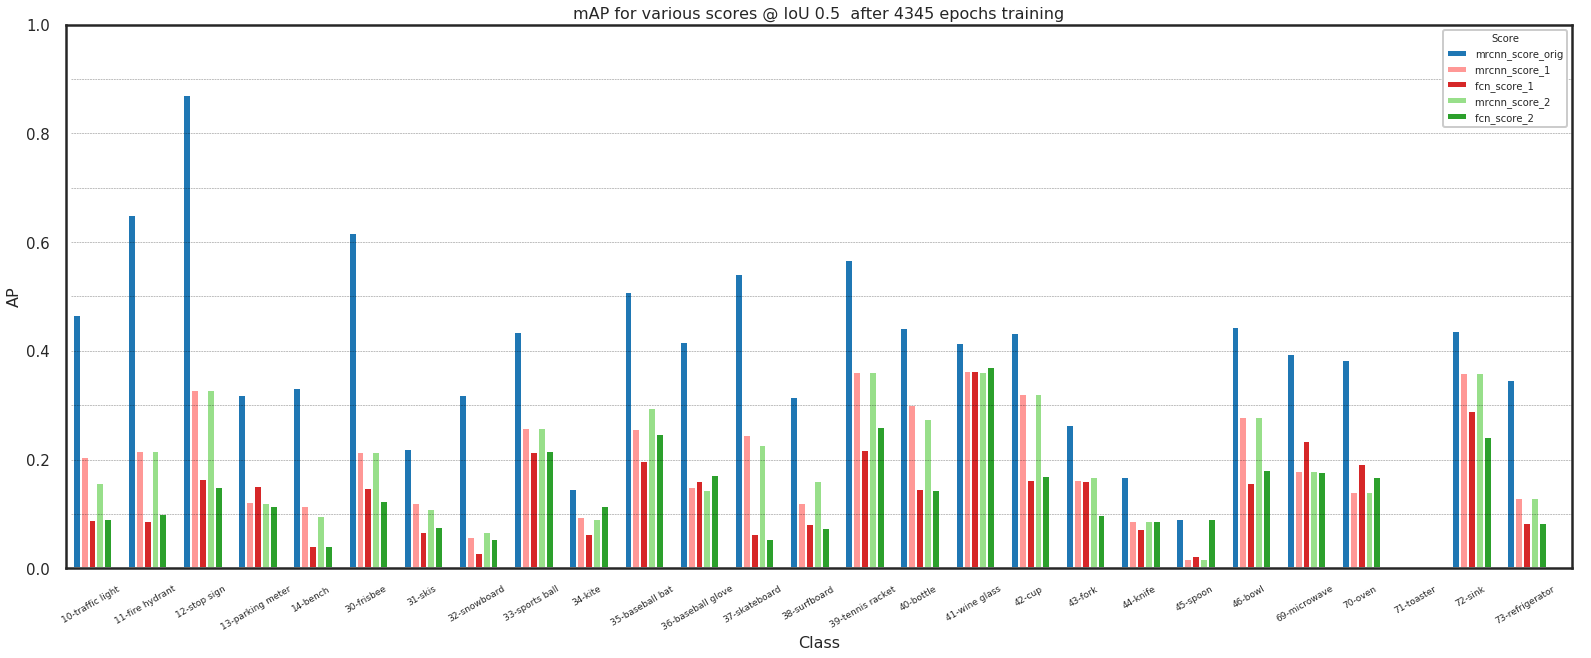


                                       AP @ IoU 0.50 Thresholds for Computed Scores after 4345 epochs                                       

-----------------------------------------------------------------  scores  -----------------------------------------------------------------
Id - ClassName           mrcnn_score_orig     mrcnn_score_1       fcn_score_1     mrcnn_score_2       fcn_score_2
--------------------------------------------------------------------------------------------------------------------------------------------
10 - traffic light                 46.52%            20.49%             8.95%            15.71%             9.00% 
11 - fire hydrant                  64.95%            21.66%             8.69%            21.66%            10.00% 
12 - stop sign                     87.07%            32.74%            16.37%            32.82%            14.95% 
13 - parking meter                 31.79%            12.17%            15.20%            12.05%            11.40% 
1

In [24]:
epoch = 4345
all_data,cls_info = cmap.load_info_files(MAP_PATH, 'test', epoch)
cmap.plot_mAP_vs_class_BarChart(all_data, disp_scores, class_ids= CLASS_IDS, class_names = CLASS_NAMES, iou = 0.5, epochs = epoch )

disp_scores:  ['mrcnn_score_orig', 'mrcnn_score_1', 'fcn_score_1', 'mrcnn_score_2', 'fcn_score_2']


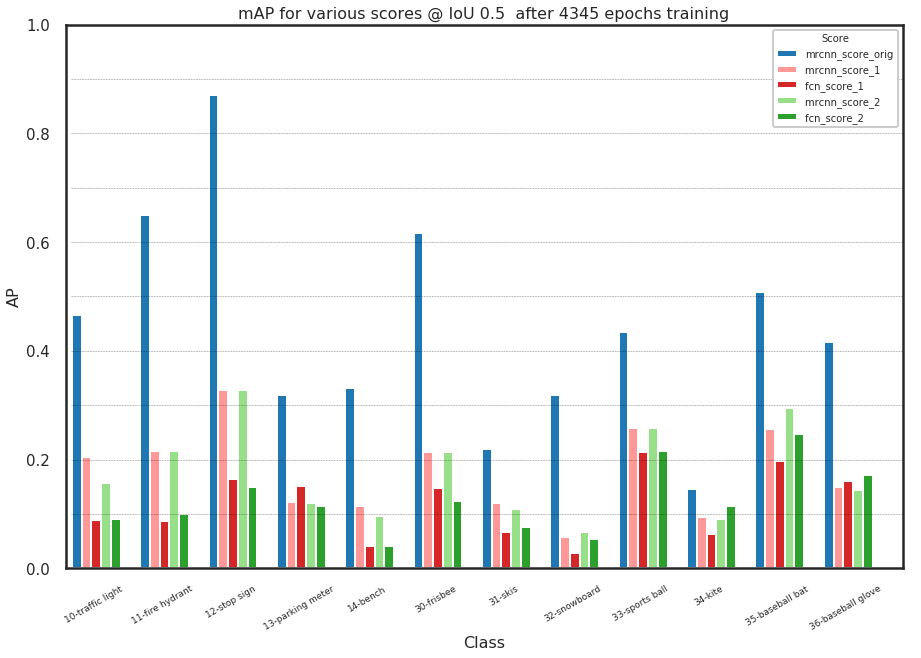


                                       AP @ IoU 0.50 Thresholds for Computed Scores after 4345 epochs                                       

-----------------------------------------------------------------  scores  -----------------------------------------------------------------
Id - ClassName           mrcnn_score_orig     mrcnn_score_1       fcn_score_1     mrcnn_score_2       fcn_score_2
--------------------------------------------------------------------------------------------------------------------------------------------
10 - traffic light                 46.52%            20.49%             8.95%            15.71%             9.00% 
11 - fire hydrant                  64.95%            21.66%             8.69%            21.66%            10.00% 
12 - stop sign                     87.07%            32.74%            16.37%            32.82%            14.95% 
13 - parking meter                 31.79%            12.17%            15.20%            12.05%            11.40% 
1

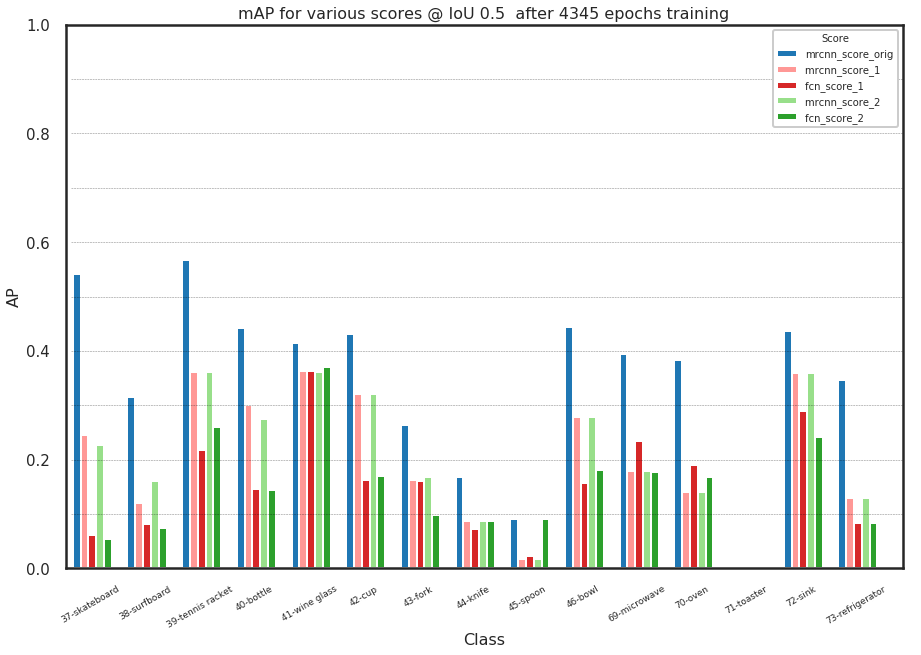


                                       AP @ IoU 0.50 Thresholds for Computed Scores after 4345 epochs                                       

-----------------------------------------------------------------  scores  -----------------------------------------------------------------
Id - ClassName           mrcnn_score_orig     mrcnn_score_1       fcn_score_1     mrcnn_score_2       fcn_score_2
--------------------------------------------------------------------------------------------------------------------------------------------
37 - skateboard                    54.20%            24.54%             6.22%            22.64%             5.31% 
38 - surfboard                     31.52%            12.04%             8.13%            16.00%             7.44% 
39 - tennis racket                 56.67%            36.06%            21.68%            36.06%            26.01% 
40 - bottle                        44.17%            30.11%            14.54%            27.44%            14.43% 
4

In [29]:
cmap.plot_mAP_vs_class_BarChart(all_data, disp_scores, class_ids= CLASS_IDS_SG1,class_names = CLASS_NAMES, iou = 0.5, epochs = epoch)
cmap.plot_mAP_vs_class_BarChart(all_data, disp_scores, class_ids= CLASS_IDS_SG2,class_names = CLASS_NAMES, iou = 0.5, epochs = epoch)

<class 'dict'>
loaded : test_map_info_epoch3816.pkl     test_cls_info_epoch3816_500.pkl
disp_scores:  ['mrcnn_score_orig', 'mrcnn_score_1', 'fcn_score_1', 'mrcnn_score_2', 'fcn_score_2']


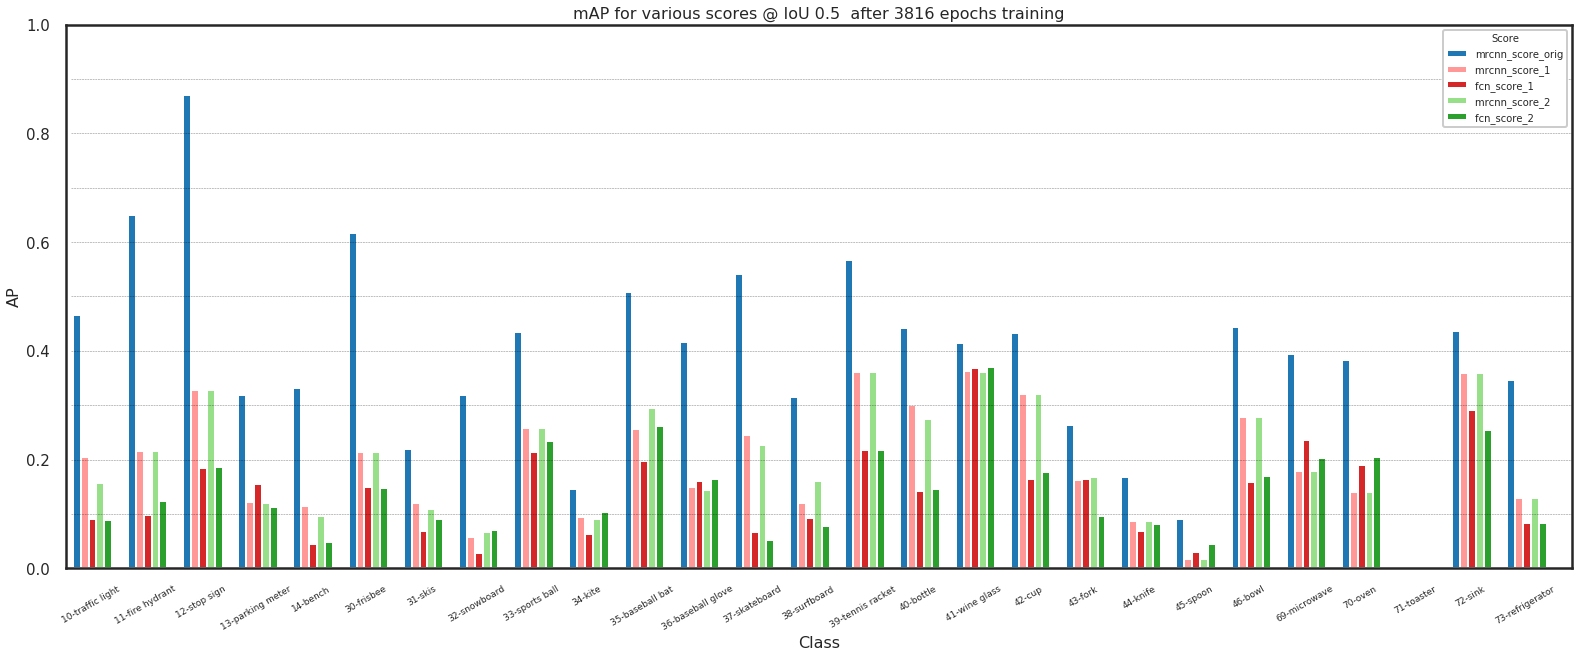


                                       AP @ IoU 0.50 Thresholds for Computed Scores after 3816 epochs                                       

-----------------------------------------------------------------  scores  -----------------------------------------------------------------
Id - ClassName           mrcnn_score_orig     mrcnn_score_1       fcn_score_1     mrcnn_score_2       fcn_score_2
--------------------------------------------------------------------------------------------------------------------------------------------
10 - traffic light                 46.52%            20.49%             9.00%            15.71%             8.88% 
11 - fire hydrant                  64.95%            21.66%             9.77%            21.66%            12.35% 
12 - stop sign                     87.07%            32.74%            18.44%            32.82%            18.68% 
13 - parking meter                 31.79%            12.17%            15.46%            12.05%            11.36% 
1

In [22]:
# disp_scores  = [ 'mrcnn_score_orig' , 'mrcnn_score_norm', 'mrcnn_score_0', 'mrcnn_score_1', 'mrcnn_score_2', 'fcn_score_0', 'fcn_score_1', 'fcn_score_2']
disp_scores  = [ 'mrcnn_score_orig' ,  'mrcnn_score_1', 'fcn_score_1', 'mrcnn_score_2', 'fcn_score_2']
epoch = 3816
all_data,cls_info = cmap.load_info_files(MAP_PATH, 'test', epoch)
cmap.plot_mAP_vs_class_BarChart(all_data, disp_scores, class_ids= CLASS_IDS, class_names = CLASS_NAMES, iou = 0.5, epochs = epoch )

In [ ]:
# cmap.plot_mAP_vs_class_BarChart(all_data, disp_scores, class_ids= CLASS_IDS_SG1,class_names = CLASS_NAMES, iou = 0.5)
# cmap.plot_mAP_vs_class_BarChart(all_data, disp_scores, class_ids= CLASS_IDS_SG2,class_names = CLASS_NAMES, iou = 0.5)

In [23]:
# cmap.plot_mAP_vs_class_BarChart(all_data, disp_scores, class_names = CLASS_NAMES, iou = 0.5)
# cmap.plot_mAP_vs_class_BarChart(all_data, disp_scores, class_names = CLASS_NAMES, iou = 0.75)

## Build Average Precision Data Structure for all class ids we are interested in 
Using loaded gt_boxes and pr_boxes.
    ALL_DATA is a dictionary keyed by class_id to dictionaries, one for each possible score. Each SCORE dictionary is itrself a dictionary with keys for iOUs 
    between 0.5 and 0.95. Each dictionary entry has the following keys:
    {'iou', 'model_thrs', 'recalls', 'precisions', 'avg_prec'}
    iou :         indicates the iOU threshold of the dictionary entry
    model_thrs:   score thresholds
    recalls   :   recall at threshold
    precision :   precision at threshold

In [ ]:
# del all_data
class_ids = [1,2,3,4,5,6]
scores    = [ 'mrcnn_score_orig', 'mrcnn_score_norm', 'mrcnn_score_0', 'mrcnn_score_1', 'mrcnn_score_2', 'fcn_score_0', 'fcn_score_1', 'fcn_score_2']
all_data = {}
all_data = cmap.build_mAP_data_structure_by_class(gt_boxes_class, pr_boxes_class, class_ids, scores)

In [ ]:
print(all_data.keys())

In [ ]:
# combined_data = build_mAP_data_structure_combined(gt_boxes, pr_boxes, scores)
all_data[0] = cmap.build_mAP_data_structure_combined(gt_boxes, pr_boxes, scores)

In [ ]:
# path = "E:\\git_projs\\MRCNN3\\train_coco"
epoch = '2017'
path = "E:\\git_projs\\MRCNN3\\train_newshapes\\training_results"
map_info_file = 'test_map_info_epoch'+epoch+'.pkl'
with open(os.path.join(path, map_info_file), 'wb') as outfile:
    pickle.dump(all_data, outfile)            


In [ ]:
print(all_data.keys())
print(all_data[1].keys())
print(all_data[1]['mrcnn_score_2'].keys())
print(all_data[1]['mrcnn_score_2'][0.5].keys())

In [ ]:
score_key = 'mrcnn_score_0'
print(all_data.keys())
print(all_data[0].keys())
print(all_data[0][score_key].keys())
print(all_data[0][score_key][0.5].keys())
print(' iou             : ', all_data[0][score_key][0.5]['iou'])
print(' score_thresholds: ', len(all_data[0][score_key][0.5]['model_thrs']))
print(' precisions      : ', len(all_data[0][score_key][0.5]['precisions']))
print(' recalls         : ', len(all_data[0][score_key][0.5]['recalls']))
print(' prec_at_rec     : ', len(all_data[0][score_key][0.5]['prec_at_rec']))
print(' prec_at_rec     : ', all_data[0][score_key][0.5]['prec_at_rec'])

In [ ]:
# for lst in all_data[1]:
#     print(lst)
#     print(all_data[1][lst])
# #     ['iou'], lst['avg_prec'])
#     print(len(all_data[1][lst]['model_thrs']), len(all_data[1][lst]['precisions']), len(all_data[1][lst]['recalls']))

### Plot AP vs. IoU Threshold for various scores 

In [ ]:
# disp_scores  = [ 'mrcnn_score_orig' , 'mrcnn_score_norm', 'mrcnn_score_0', 'mrcnn_score_1', 'mrcnn_score_2', 'fcn_score_0', 'fcn_score_1', 'fcn_score_2']
disp_scores  = [ 'mrcnn_score_orig' , 'mrcnn_score_0', 'mrcnn_score_1', 'mrcnn_score_2', 'fcn_score_1', 'fcn_score_2']
cmap.plot_mAP_vs_IoUs_BarChart(all_data, disp_scores)

## Plot combined mAP for different IoU thresholds for each score
(one type of score, e.g. 'scores' - all classes combined)

In [ ]:
# plot_mAP_by_score(all_data, 'scores' )

cmap.plot_mAP_by_IOU(all_data, 'mrcnn_score_orig' , class_ids = 0 , class_names = class_names, columns = 3)

In [ ]:
# plot_mAP_by_score(all_data, 'scores' )

cmap.plot_mAP_by_IOU(all_data, 'mrcnn_score_0' , class_ids = 0 , class_names = class_names, columns = 3)

In [ ]:
# plot_mAP_by_score(all_data, 'scores' )
cmap.plot_mAP_by_IOU(all_data, 'mrcnn_score_1' , class_ids = 0 ,class_names = class_names, columns = 3)

In [ ]:
# plot_mAP_by_score(all_data, 'scores' )
cmap.plot_mAP_by_IOU(all_data, 'mrcnn_score_2' , class_ids = 0 ,class_names = class_names, columns = 3)

In [ ]:
# plot_mAP_by_score(all_data, 'scores' )
cmap.plot_mAP_by_IOU(all_data, 'mrcnn_score_norm' , class_ids = 0 ,class_names = class_names, columns = 3)

In [ ]:
# plot_mAP_by_score(all_data, 'scores' )
cmap.plot_mAP_by_IOU(all_data, 'fcn_score_0' , class_ids = 0 , class_names = class_names,columns = 3)

In [ ]:
# plot_mAP_by_score(all_data, 'scores' )
cmap.plot_mAP_by_IOU(all_data, 'fcn_score_1' , class_ids = 0 , class_names = class_names,columns = 3)

In [ ]:
# plot_mAP_by_score(all_data, 'scores' )
cmap.plot_mAP_by_IOU(all_data, 'fcn_score_2' , class_ids = 0 , class_names = class_names,columns = 3)

## Plot combined mAP info for different scores (at a given IoU threshold, all classes combined)

col/rows:  1 1

                                                     AP @ IoU 0.80 Thresholds for Computed Scores                                                     

----------------------------------------------------------------------  scores  ----------------------------------------------------------------------
Id - ClassName           mrcnn_score_orig     mrcnn_score_1     mrcnn_score_2       fcn_score_1       fcn_score_2
------------------------------------------------------------------------------------------------------------------------------------------------------
BG                                 12.44%             5.90%             4.73%             2.29%             3.50%
------------------------------------------------------------------------------------------------------------------------------------------------------


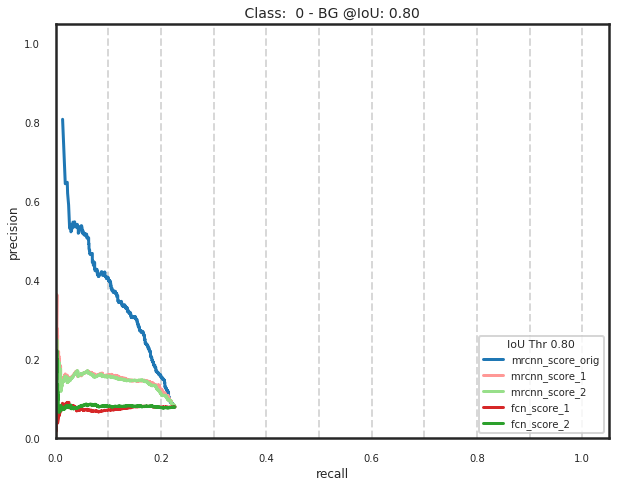

In [15]:
disp_scores  = [ 'mrcnn_score_orig' , 'mrcnn_score_1', 'mrcnn_score_2', 'fcn_score_1', 'fcn_score_2']
cmap.plot_mAP_by_scores(all_data, scores = disp_scores, class_ids = [0], class_names = CLASS_NAMES,iou = 0.80)

In [ ]:
disp_scores  = [ 'mrcnn_score_orig' , 'mrcnn_score_norm', 'mrcnn_score_0', 'mrcnn_score_1',  'fcn_score_0', 'fcn_score_1', 'fcn_score_2']
cmap.plot_mAP_by_scores(all_data, scores = disp_scores, class_ids = [0], class_names = class_names, iou = 0.85)

In [ ]:
disp_scores  = [ 'mrcnn_score_orig' , 'mrcnn_score_norm', 'mrcnn_score_0', 'mrcnn_score_1',  'fcn_score_0', 'fcn_score_1', 'fcn_score_2']
cmap.plot_mAP_by_scores(all_data, scores = disp_scores, class_ids = [0], class_names = class_names, iou = 0.75)

## Indvidual classes - Plot mAP info for  at different thresholds (one type of score, e.g. 'scores')

### Plot mAP for `mrcnn_score_orig`

In [ ]:
# plot_mAP_by_score(all_data, 'scores' )
cmap.plot_mAP_by_IOU(all_data, 'mrcnn_score_orig', class_names = class_names )

### Plot mAP for `mrcnn_score_norm`

In [ ]:
plot_mAP_by_IOU(all_data, 'mrcnn_score_norm')

### Plot mAP for `mrcnn_score_0`

In [ ]:
cmap.plot_mAP_by_IOU(all_data, 'mrcnn_score_0', class_names = class_names )

### Plot mAP for `mrcnn_score_1`

In [ ]:
plot_mAP_by_IOU(all_data, 'mrcnn_score_1', class_names = class_names )

### Plot mAP for `mrcnn_score_2`

In [ ]:
cmap.plot_mAP_by_IOU(all_data, 'mrcnn_score_2', class_names = class_names )

### Plot mAP for `fcn_score_1`

In [ ]:
cmap.plot_mAP_by_IOU(all_data, 'fcn_score_1', class_names = class_names )

### Plot mAP for `fcn_score_2`

In [ ]:
cmap.plot_mAP_by_IOU(all_data, 'fcn_score_2', class_names = class_names )

## Indvidual classes - Plot mAP info for different scores (at a given IoU threshold)

###  Calculate information for one class at one  threshold with different scores, e.g. 'scores')

In [ ]:
disp_classes = [0,1,2,3,4,5,6]  
disp_scores  = [ 'mrcnn_score_orig' , 'mrcnn_score_norm', 'mrcnn_score_0', 'mrcnn_score_1', 'mrcnn_score_2', 'fcn_score_0', 'fcn_score_1', 'fcn_score_2']
cmap.plot_mAP_by_scores(all_data, scores = disp_scores, class_ids = disp_classes, class_names= class_names, iou = 0.75)

Epch: 4345
col/rows:  3 4

                                                     AP @ IoU 0.50 Thresholds for Computed Scores                                                     

----------------------------------------------------------------------  scores  ----------------------------------------------------------------------
Id - ClassName           mrcnn_score_orig     mrcnn_score_1       fcn_score_1
------------------------------------------------------------------------------------------------------------------------------------------------------
10 - traffic light                 46.52%            20.49%             8.95% 
11 - fire hydrant                  64.95%            21.66%             8.69% 
12 - stop sign                     87.07%            32.74%            16.37% 
13 - parking meter                 31.79%            12.17%            15.20% 
14 - bench                         33.13%            11.42%             4.12% 
30 - frisbee                       61.69%     

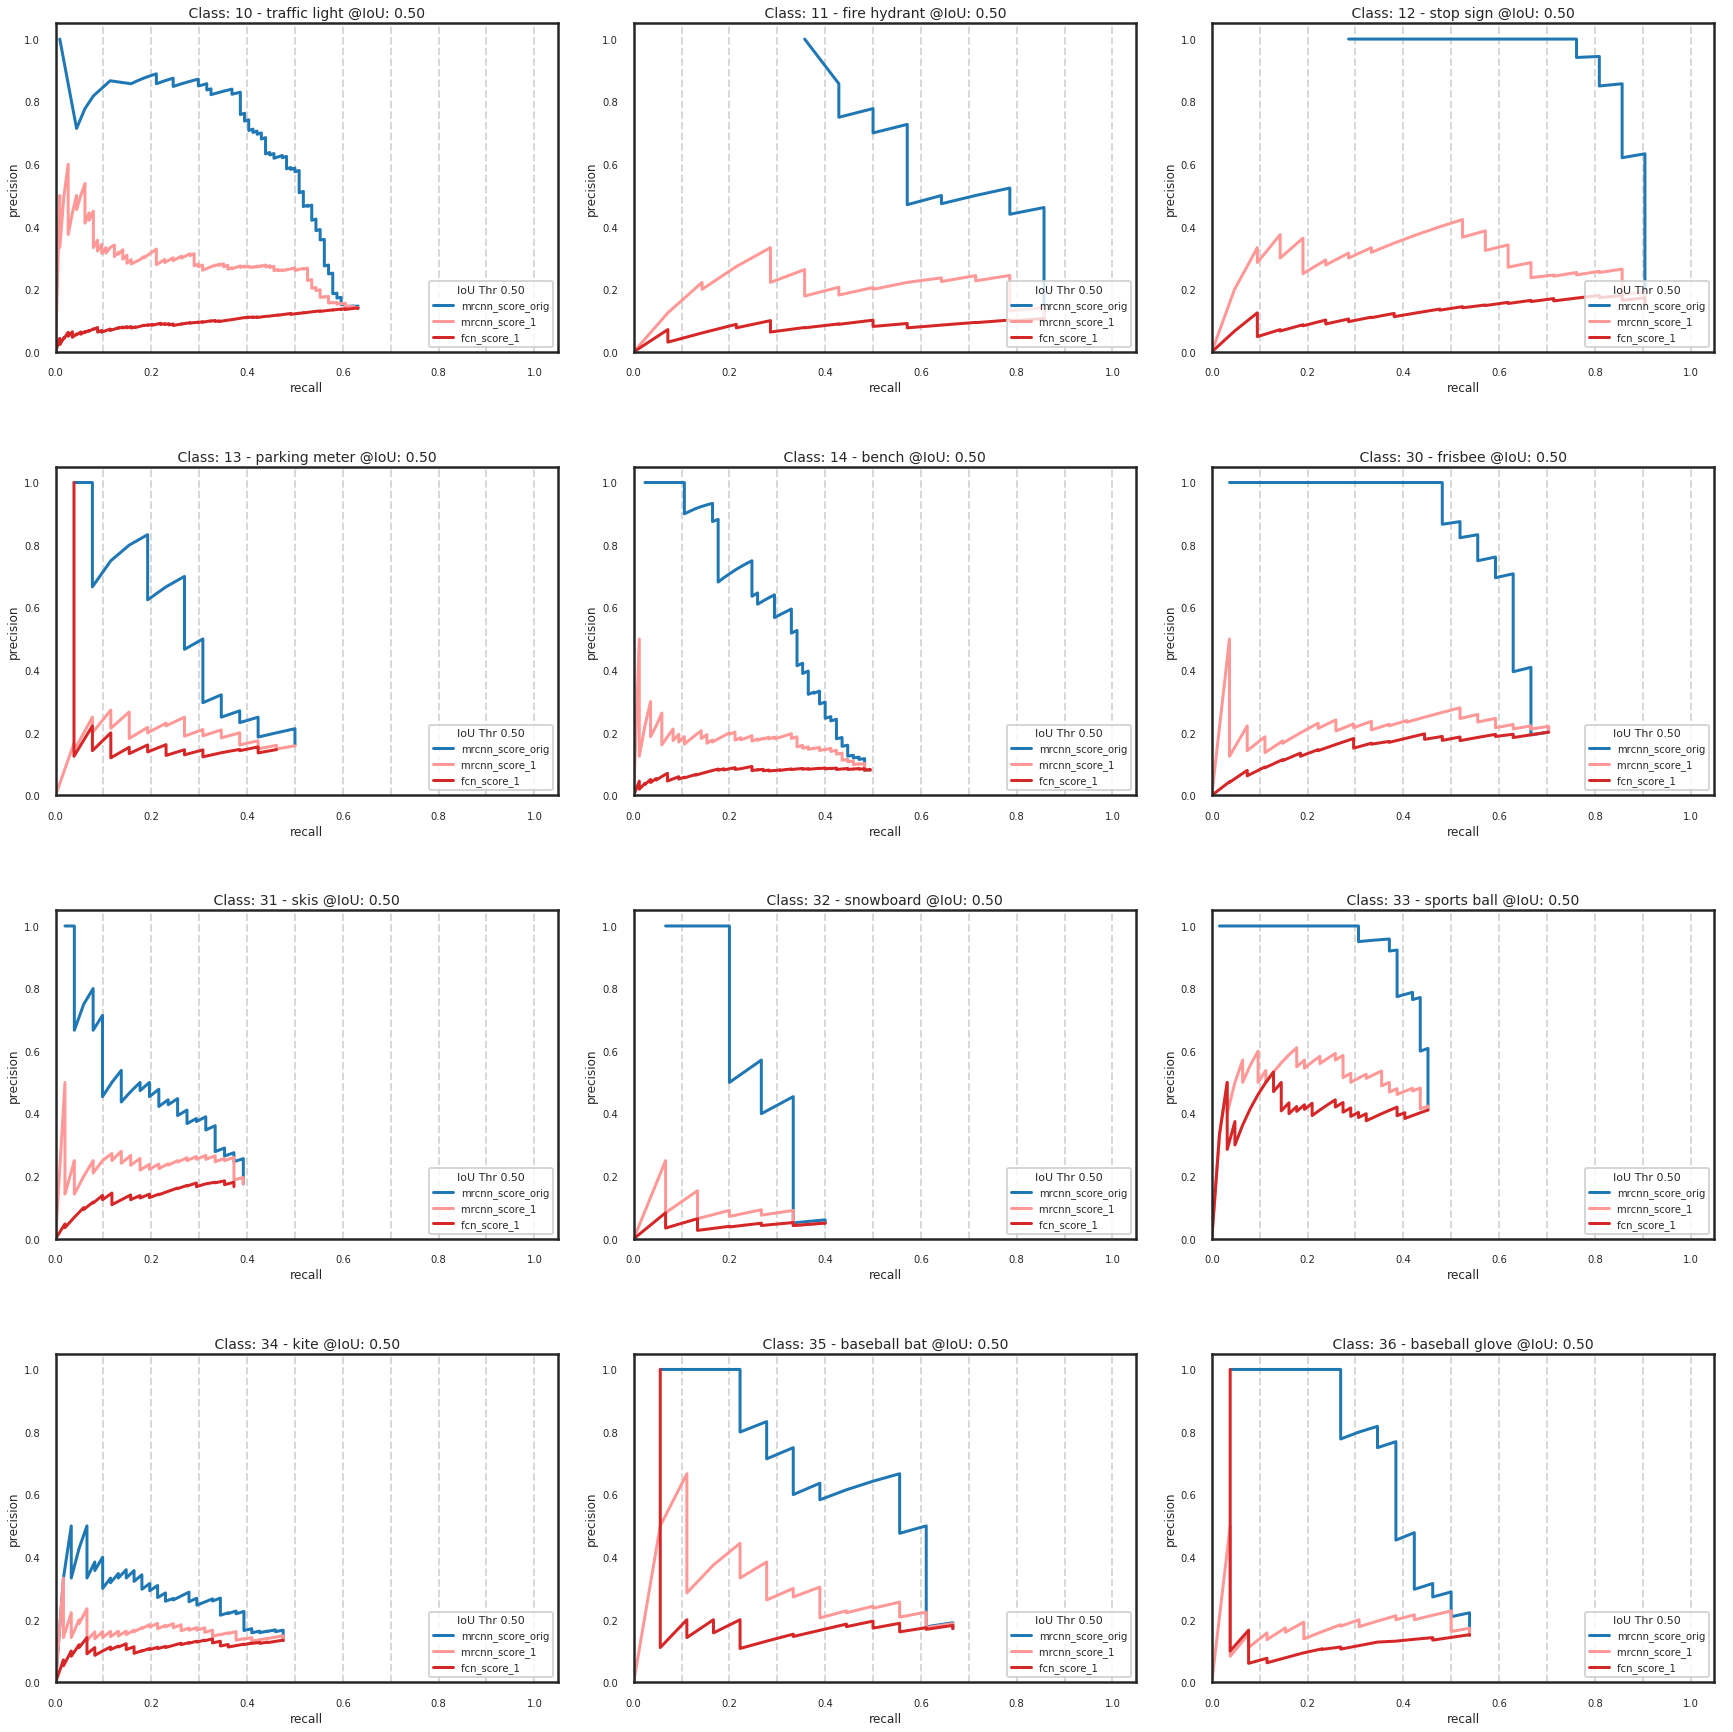

col/rows:  3 4

                                                     AP @ IoU 0.50 Thresholds for Computed Scores                                                     

----------------------------------------------------------------------  scores  ----------------------------------------------------------------------
Id - ClassName           mrcnn_score_orig     mrcnn_score_2       fcn_score_2
------------------------------------------------------------------------------------------------------------------------------------------------------
10 - traffic light                 46.52%            15.71%             9.00% 
11 - fire hydrant                  64.95%            21.66%            10.00% 
12 - stop sign                     87.07%            32.82%            14.95% 
13 - parking meter                 31.79%            12.05%            11.40% 
14 - bench                         33.13%             9.56%             4.19% 
30 - frisbee                       61.69%            21.3

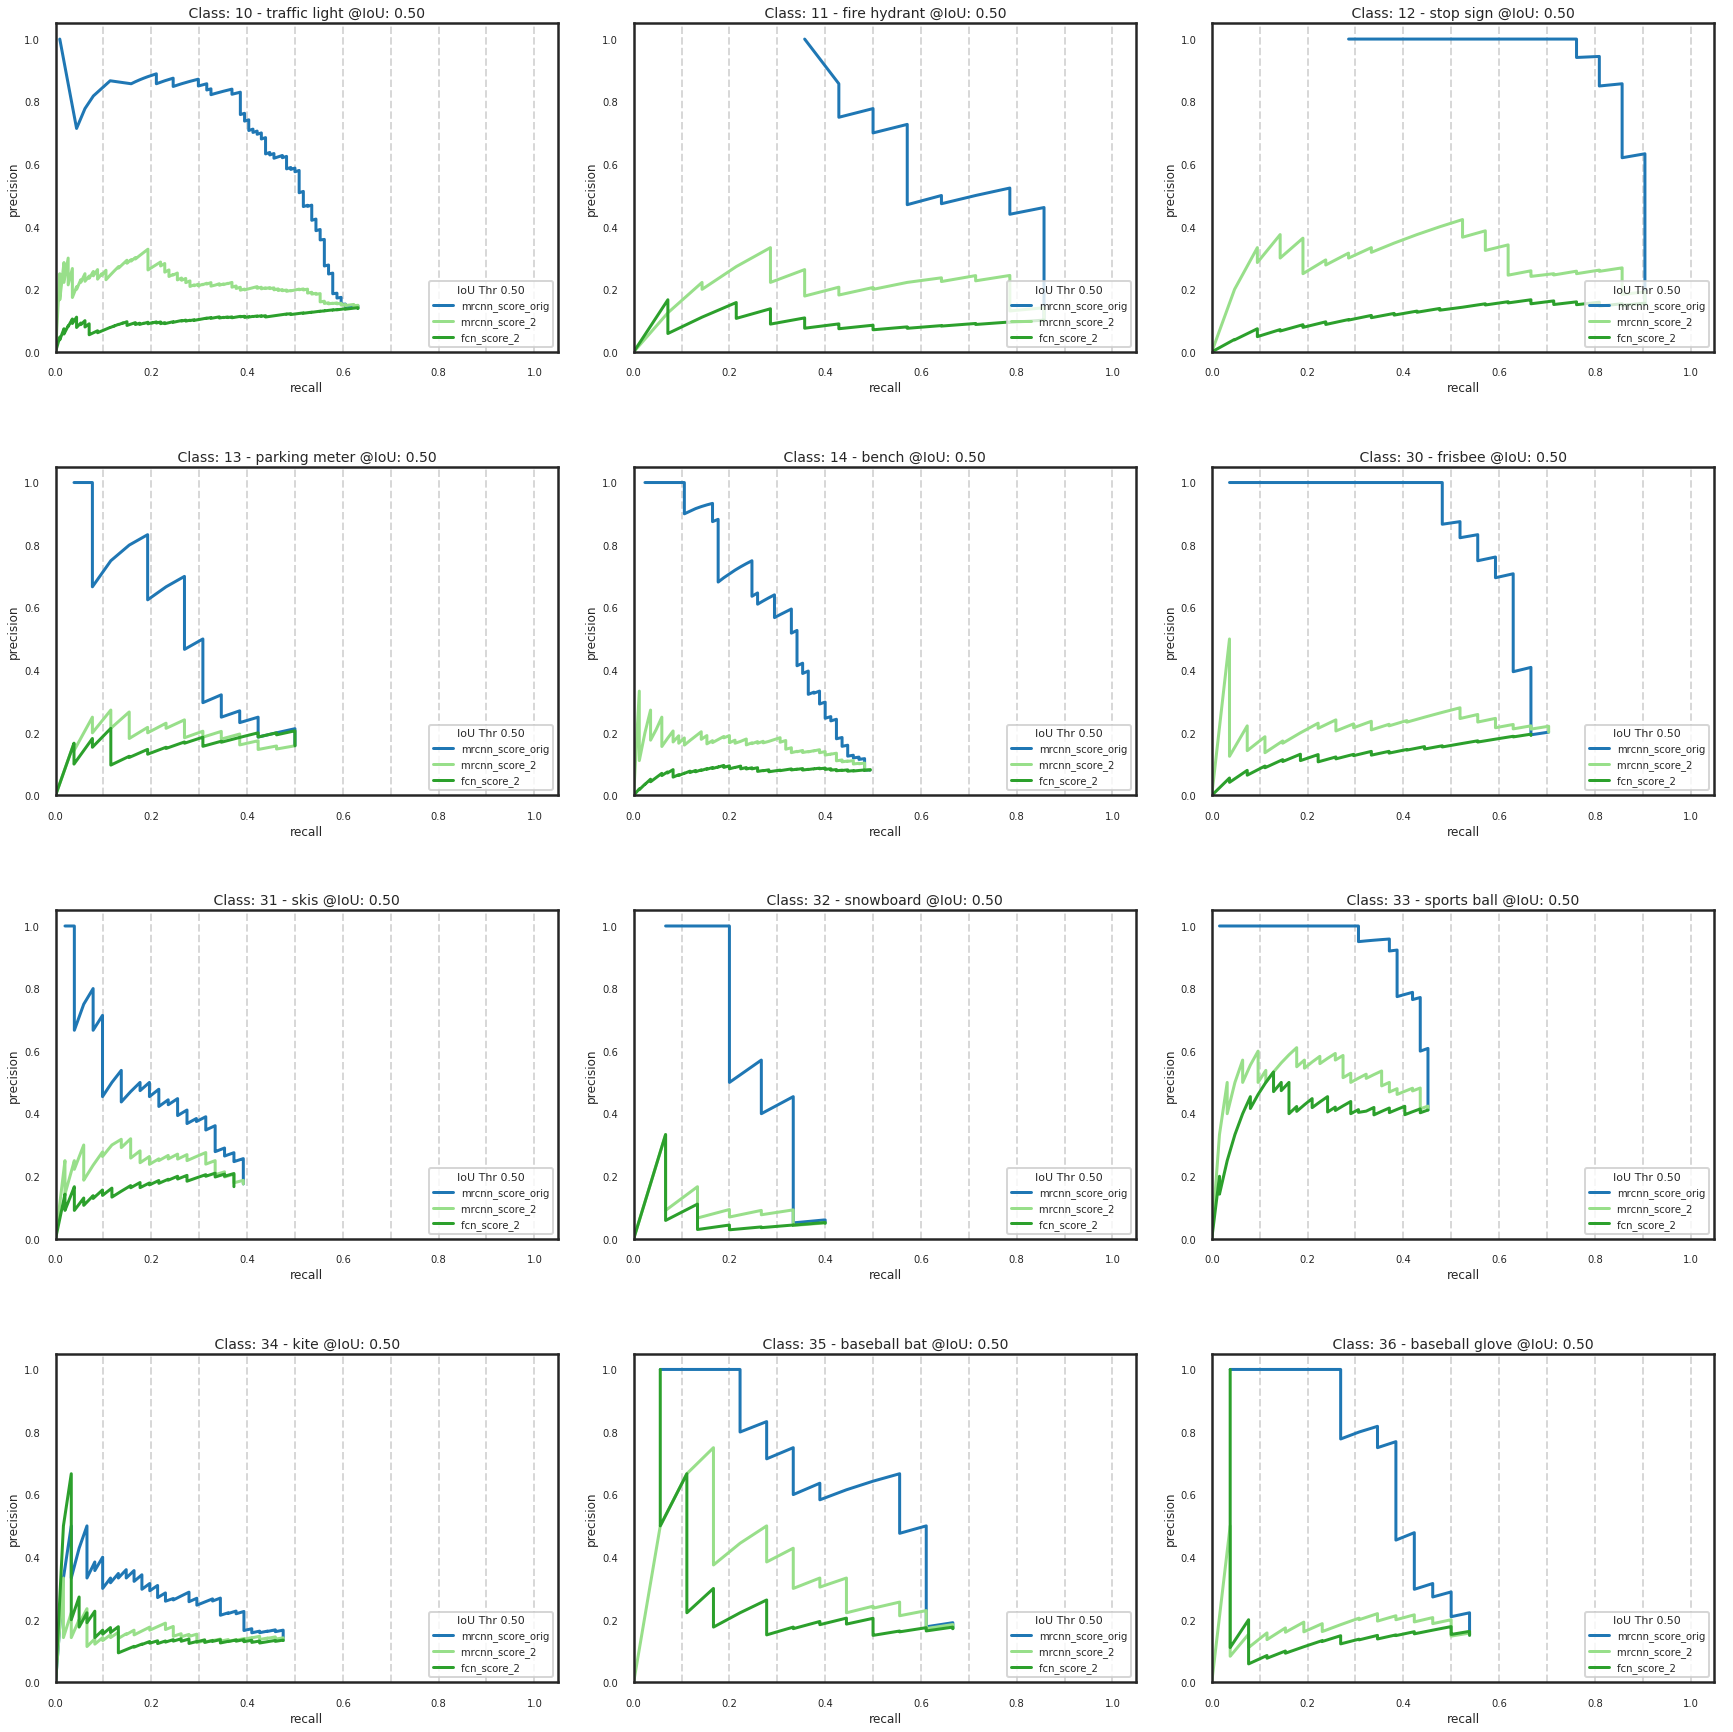

In [30]:
print('Epch:', epoch)
# disp_classes = [1,2,3,4,5,6,7,8]
disp_scores  = [ 'mrcnn_score_orig', 'mrcnn_score_1',  'fcn_score_1']
# cmap.plot_mAP_by_scores(all_data, scores = disp_scores, class_ids = disp_classes, class_names= CLASS_NAMES, iou = 0.50, columns = 2, min_y =0.7)
cmap.plot_mAP_by_scores(all_data, scores = disp_scores, class_ids = CLASS_IDS_SG1, class_names= CLASS_NAMES, iou = 0.5, columns = 3)
disp_scores  = [ 'mrcnn_score_orig', 'mrcnn_score_2', 'fcn_score_2']
cmap.plot_mAP_by_scores(all_data, scores = disp_scores, class_ids = CLASS_IDS_SG1, class_names= CLASS_NAMES, iou = 0.5, columns = 3)

In [ ]:
# cls = 1
# for i in pr_boxes_class[cls]:
#     print(i)
#     print(pr_boxes_class[cls][i]['scores'])
#     print(pr_boxes_class[cls][i]['mrcnn_score_orig'])
#     print(pr_boxes_class[cls][i]['mrcnn_score_norm'])
#     print('---------')

In [ ]:
pp.pprint(all_data[1].keys())

In [ ]:
# pp.pprint(all_data[1]['mrcnn_score_norm'])

In [ ]:
pp.pprint(all_data[1]['mrcnn_score_orig'])

In [ ]:
pp.pprint(all_data[1]['scores'])

In [ ]:
print(all_data[1]['mrcnn_score_0'])

In [ ]:
print(all_data[1]['mrcnn_score_1'])

In [ ]:
print(all_data[1]['mrcnn_score_2'])

In [ ]:
print(all_data[1]['scores'] == all_data[1]['mrcnn_score_orig'])

In [ ]:
for idx, iou_thr in enumerate(np.linspace(0.5, 0.95, 10)):
    print(idx, iou_thr, np.round(iou_thr,2))
for idx, iou_thr in enumerate(np.arange(0.5, 0.95, 0.05)):
    print(idx, iou_thr)    
for idx, iou_thr in enumerate(range(0.5, 0.95,  0.05)):
    print(idx, iou_thr)    

## Code from `calculate_mean_ap.py`

### `get_models_scores_map()`

In [ ]:
def get_model_scores_map(pred_boxes, score_key ):
    """Creates a dictionary of from model_scores to image ids.

    Args:
        pred_boxes (dict): dict of dicts of 'boxes' and 'scores'

    Returns:
        dict: keys are model_scores and values are image ids (usually filenames)

    """
    model_scores_map = {}
    for img_id, val in pred_boxes.items():
        for raw_score in val['scores']:
            score = round(raw_score,5)
            if score not in model_scores_map.keys():
                model_scores_map[score] = [img_id]
            else:
                model_scores_map[score].append(img_id)
    return model_scores_map

In [ ]:
from copy import deepcopy
def get_avg_precision_at_iou(in_gt_boxes, in_pred_boxes, iou_thr=0.5, score_key = 'scores'):
    '''
    Calculates average precision at given IoU threshold.

    Args:
        gt_boxes (list of list of floats): list of locations of ground truth
            objects as [xmin, ymin, xmax, ymax]
        pred_boxes (list of list of floats): list of locations of predicted
            objects as [xmin, ymin, xmax, ymax]
        iou_thr (float): value of IoU to consider as threshold for a
            true prediction.

    Returns:
        dict: avg precision as well as summary info about the PR curve

        Keys:
            'avg_prec' (float): average precision for this IoU threshold
            'precisions' (list of floats): precision value for the given
                model_threshold
            'recall' (list of floats): recall value for given
                model_threshold
            'models_thrs' (list of floats): model threshold value that
                precision and recall were computed for.
    '''
    gt_boxes = deepcopy(in_gt_boxes)
    pred_boxes = deepcopy(in_pred_boxes)
    model_scores_map    = get_model_scores_map(pred_boxes, score_key = score_key)
    sorted_model_scores = sorted(model_scores_map.keys())
    print('sorted_model_scores :' , sorted_model_scores)
    
    ## Sort the predicted boxes in ascending score order (lowest scoring boxes first):
    for img_id in pred_boxes.keys():
        
        arg_sort = np.argsort(pred_boxes[img_id][score_key])
        print()
        print('image_id : ', img_id)
        print('--------------------------')
        print('scores:', pred_boxes[img_id]['scores'] )
        print(score_key, ':' ,pred_boxes[img_id][score_key] )
        print(pred_boxes[img_id]['boxes'] )
        print('argsort:' , arg_sort)
        pred_boxes[img_id]['scores'] = np.array(pred_boxes[img_id][score_key])[arg_sort].tolist()
        pred_boxes[img_id]['boxes']  = np.array(pred_boxes[img_id]['boxes'])[arg_sort].tolist()
        print('after')
        print('--------------------------')
        print('scores:', pred_boxes[img_id]['scores'] )
        print(score_key, ':' ,pred_boxes[img_id][score_key] )
        print(pred_boxes[img_id]['boxes'] )
        
        
    pred_boxes_pruned = deepcopy(pred_boxes)

    precisions  = []
    recalls     = []
    model_thrs  = []
    img_results = {}
    
    # Loop over model score thresholds and calculate precision, recall
    for ithr, model_score_thr in enumerate(sorted_model_scores[:-1]):
        # On first iteration, define img_results for the first time:
        print('------------------------------------------------')
        print('ithr ', ithr, 'model_scr_thr', model_score_thr)
        print('------------------------------------------------')
        img_ids = gt_boxes.keys() if ithr == 0 else model_scores_map[model_score_thr]
        for img_id in img_ids:
            gt_boxes_img = gt_boxes[img_id]['boxes']
            box_scores = pred_boxes_pruned[img_id]['scores']
            start_idx = 0
            for score in box_scores:
                if score <= model_score_thr:
#                     pred_boxes_pruned[img_id]
                    start_idx += 1
                else:
                    break
            print('Start Idx is ', start_idx)
            # Remove boxes, scores of lower than threshold scores:
            pred_boxes_pruned[img_id]['scores'] = pred_boxes_pruned[img_id]['scores'][start_idx:]
            pred_boxes_pruned[img_id]['boxes']  = pred_boxes_pruned[img_id]['boxes'][start_idx:]

            # Recalculate image results for this image
            img_results[img_id] = cmap.get_single_image_results(
                gt_boxes_img, pred_boxes_pruned[img_id]['boxes'], iou_thr)
            print('image_id : ', img_id)
            print('--------------------------')            
            pp.pprint(gt_boxes_img)
            pp.pprint(pred_boxes_pruned[img_id]['boxes'])
            pp.pprint(img_results[img_id])
            print()
        prec, rec = cmap.calc_precision_recall(img_results)
        print('precision:', prec, 'Recall:', rec)
        precisions.append(prec)
        recalls.append(rec)
        model_thrs.append(model_score_thr)

    precisions = np.array(precisions)
    recalls = np.array(recalls)
    print('final precsions:', precisions)
    print('final recall   :', recalls)
    prec_at_rec = []
    for recall_level in np.linspace(0.0, 1.0, 11):
        try:
            args = np.argwhere(recalls >= recall_level).flatten()
            prec = max(precisions[args])
        except ValueError:
            prec = 0.0
        prec_at_rec.append(prec)
    avg_prec = np.mean(prec_at_rec)

    return {
        'avg_prec': avg_prec,
        'precisions': precisions,
        'recalls': recalls,
        'model_thrs': model_thrs}


In [ ]:
class_ids = [1,2,3,4,5,6]
## build gt_boxes_class, pr_boxes_class which only containing info for each class 
gt_boxes_class = {}
pr_boxes_class = {}

for cls in class_ids :
    print('class id :', cls)
    a, b = filter_by_class(gt_boxes, pr_boxes, class_id= cls)
    gt_boxes_class[cls] = a
    pr_boxes_class[cls] = b
print(gt_boxes_class.keys())    
print(pr_boxes_class.keys())    
print(gt_boxes_class[1]['newshapes_00992'].keys())


In [ ]:
# msm = get_model_scores_map(pr_boxes_class[1], score_key = 'scores') 
print(pr_boxes_class[1].keys())
print(pr_boxes_class[1]['newshapes_00992']['mrcnn_score_orig'])
print(pr_boxes_class[1]['newshapes_00992']['scores'])
print(pr_boxes_class[1]['newshapes_00992']['boxes'])
print(pr_boxes_class[1]['newshapes_00992']['det_ind'])
print(gt_boxes_class[1]['newshapes_00992']['boxes'])

In [ ]:
# msm = get_model_scores_map(pr_boxes_class[1], score_key = 'scores') 
print(pr_boxes_class[1].keys())
print(pr_boxes_class[1]['newshapes_00992']['mrcnn_score_orig'])
print(pr_boxes_class[1]['newshapes_00992']['scores'])
print(pr_boxes_class[1]['newshapes_00992']['boxes'])
print(pr_boxes_class[1]['newshapes_00992']['det_ind'])
print(gt_boxes_class[1]['newshapes_00992']['boxes'])

print()

print(pr_boxes['newshapes_00992']['class_ids'])
print(pr_boxes['newshapes_00992']['mrcnn_score_orig'])
print(pr_boxes['newshapes_00992']['scores'])
print(pr_boxes['newshapes_00992']['boxes'])

In [ ]:
data1 = get_avg_precision_at_iou(gt_boxes_class[1], pr_boxes_class[1], iou_thr= 0.5, score_key = 'scores')
print(data1)

In [ ]:
print(pr_boxes_class[1].keys())
print(pr_boxes_class[1]['newshapes_00992']['mrcnn_score_orig'])
print(pr_boxes_class[1]['newshapes_00992']['scores'])
print(pr_boxes_class[1]['newshapes_00992']['boxes'])
print(pr_boxes_class[1]['newshapes_00992']['det_ind'])
print(gt_boxes_class[1]['newshapes_00992']['boxes'])

In [ ]:
data2 = get_avg_precision_at_iou(gt_boxes_class[1], pr_boxes_class[1], iou_thr= 0.5, score_key = 'mrcnn_score_orig')
print(data2)

In [ ]:
print(data1)
print(data2)

In [ ]:
print(pr_boxes_class[1].keys())
print(pr_boxes_class[1]['newshapes_00992']['mrcnn_score_orig'])
print(pr_boxes_class[1]['newshapes_00992']['scores'])
print(pr_boxes_class[1]['newshapes_00992']['boxes'])
print(pr_boxes_class[1]['newshapes_00992']['det_ind'])
print(gt_boxes_class[1]['newshapes_00992']['boxes'])

In [ ]:
data3 = cmap.get_avg_precision_at_iou(gt_boxes_class[1], pr_boxes_class[1], iou_thr= 0.5, score_key = 'mrcnn_score_orig')
print(data3)

In [ ]:
print(pr_boxes_class[1].keys())
print(pr_boxes_class[1]['newshapes_00992']['mrcnn_score_orig'])
print(pr_boxes_class[1]['newshapes_00992']['scores'])
print(pr_boxes_class[1]['newshapes_00992']['boxes'])
print(pr_boxes_class[1]['newshapes_00992']['det_ind'])
print(gt_boxes_class[1]['newshapes_00992']['boxes'])

In [ ]:
data4 = cmap.get_avg_precision_at_iou(gt_boxes_class[1], pr_boxes_class[1], iou_thr= 0.5, score_key = 'scores')
print(data4)

In [ ]:
data5 = cmap.get_avg_precision_at_iou(gt_boxes_class[1], pr_boxes_class[1], iou_thr= 0.5, score_key = 'mrcnn_score_norm')
print(data5)

In [ ]:
print(data3)
print(data4)
print(data5)

In [ ]:
print(pr_boxes_class[1].keys())
print(pr_boxes_class[1]['newshapes_00992']['mrcnn_score_norm'])
print(pr_boxes_class[1]['newshapes_00992']['mrcnn_score_orig'])
print(pr_boxes_class[1]['newshapes_00992']['scores'])
print(pr_boxes_class[1]['newshapes_00992']['boxes'])
print(pr_boxes_class[1]['newshapes_00992']['det_ind'])
print(gt_boxes_class[1]['newshapes_00992']['boxes'])